# Geographic data in R

In [1]:
options(repr.plot.width=10, repr.plot.height=10)


In [2]:
library(tidyverse)
library(sf)
library(spData)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Linking to GEOS 3.9.0, GDAL 3.2.2, PROJ 7.2.1



There are two fundamental types of geographic data in R:

- vector data
- raster data

**Vector data** consist of discrete objects $-$ points, lines, polygons etc.

**Raster data** divide a surface into discrete cell of constant size. Each cell is associated with various feature values.


Typical vector data:

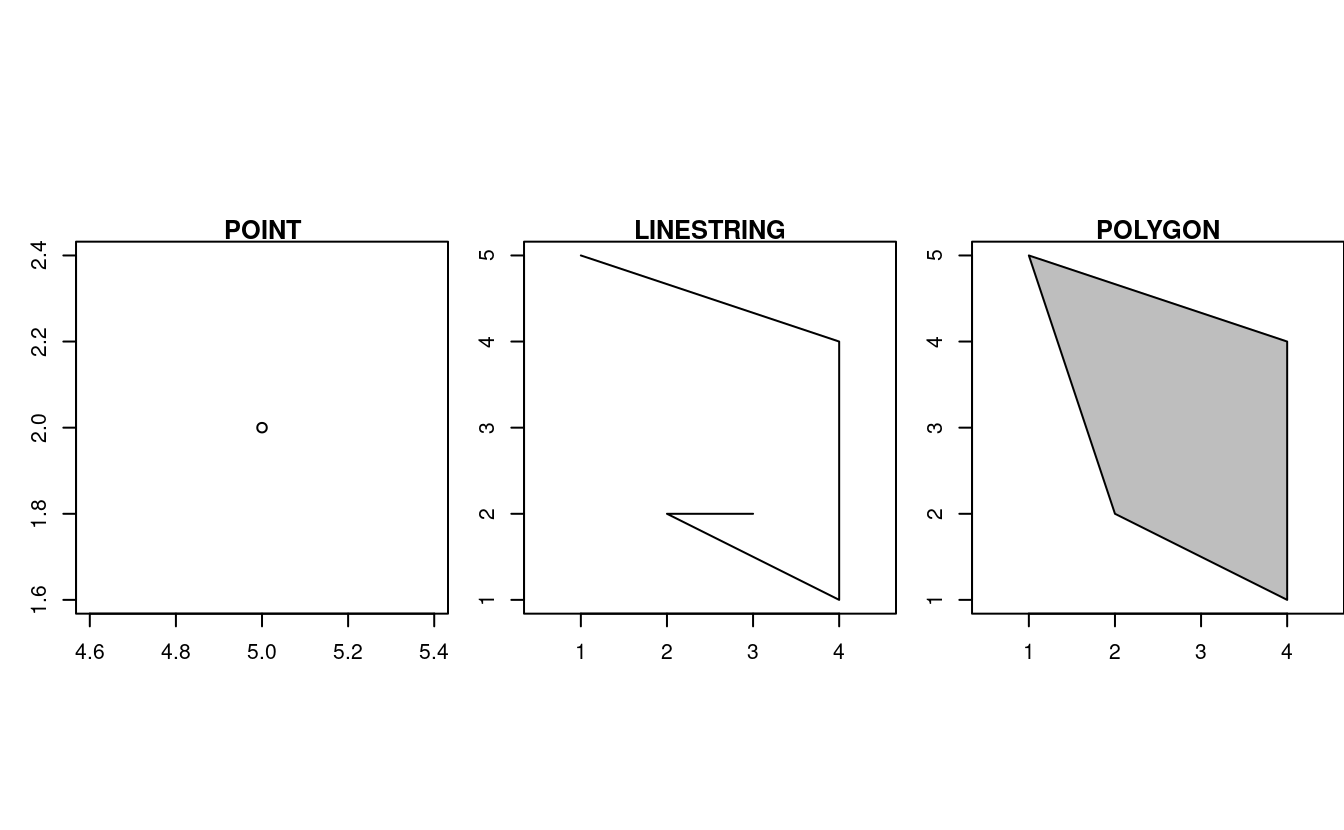

Typical raster data:

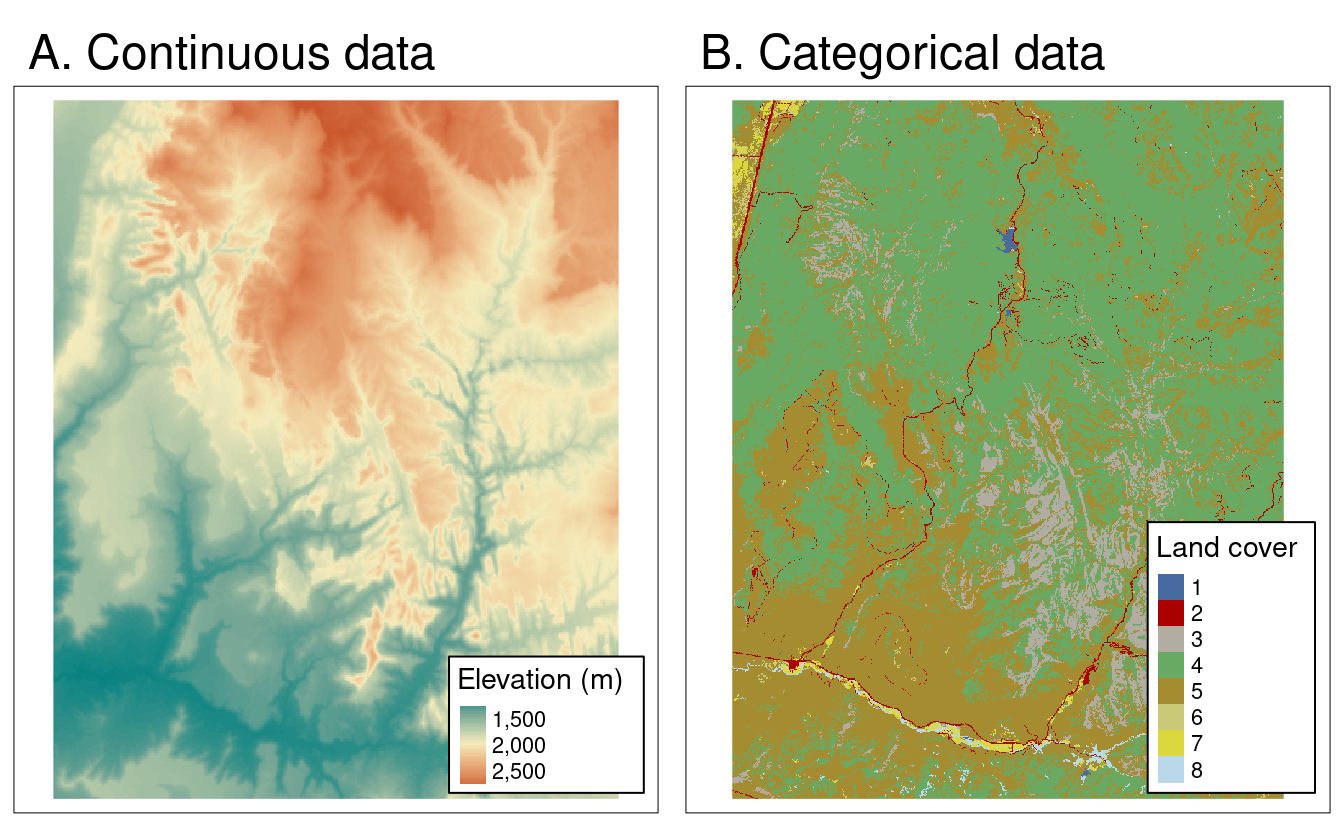



## Vector data

Standard data type is an `sf` data frame. Example: `world` from the `sp`package.


In [3]:
world

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geom
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.97,885806,69.96000,8222.2538,MULTIPOLYGON (((-180 -16.55...
2,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.79,52234869,64.16300,2402.0994,MULTIPOLYGON (((33.90371 -0...
3,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.60,NA,NA,NA,MULTIPOLYGON (((-8.66559 27...
4,CA,Canada,North America,Americas,Northern America,Sovereign country,10036042.98,35535348,81.95305,43079.1425,MULTIPOLYGON (((-132.71 54....
5,US,United States,North America,Americas,Northern America,Country,9510743.74,318622525,78.84146,51921.9846,MULTIPOLYGON (((-171.7317 6...
6,KZ,Kazakhstan,Asia,Asia,Central Asia,Sovereign country,2729810.51,17288285,71.62000,23587.3375,MULTIPOLYGON (((87.35997 49...
7,UZ,Uzbekistan,Asia,Asia,Central Asia,Sovereign country,461410.26,30757700,71.03900,5370.8658,MULTIPOLYGON (((55.96819 41...
8,PG,Papua New Guinea,Oceania,Oceania,Melanesia,Sovereign country,464520.07,7755785,65.23000,3709.0816,MULTIPOLYGON (((141.0002 -2...
9,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1819251.33,255131116,68.85600,10003.0890,MULTIPOLYGON (((104.37 -1.0...


In [4]:
class(world)

[1] "sf"         "tbl_df"     "tbl"        "data.frame"

An `sf` data frame is a tibble with additional features. 

Most importantly, it contains a `geom` column.

In [5]:
world$geom

MULTIPOLYGON (((-180 -16.55522, -179.9174 -16.5...

MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.027...

MULTIPOLYGON (((-8.66559 27.65643, -8.817828 27...

MULTIPOLYGON (((-132.71 54.04001, -133.18 54.16...

MULTIPOLYGON (((-171.7317 63.78252, -171.7911 6...



Geometry set for 177 features 
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -180 ymin: -89.9 xmax: 180 ymax: 83.64513
Geodetic CRS:  WGS 84
First 5 geometries:

In [6]:
names(world)

[1] "iso_a2"    "name_long" "continent" "region_un" "subregion" "type"     
 [7] "area_km2"  "pop"       "lifeExp"   "gdpPercap" "geom"

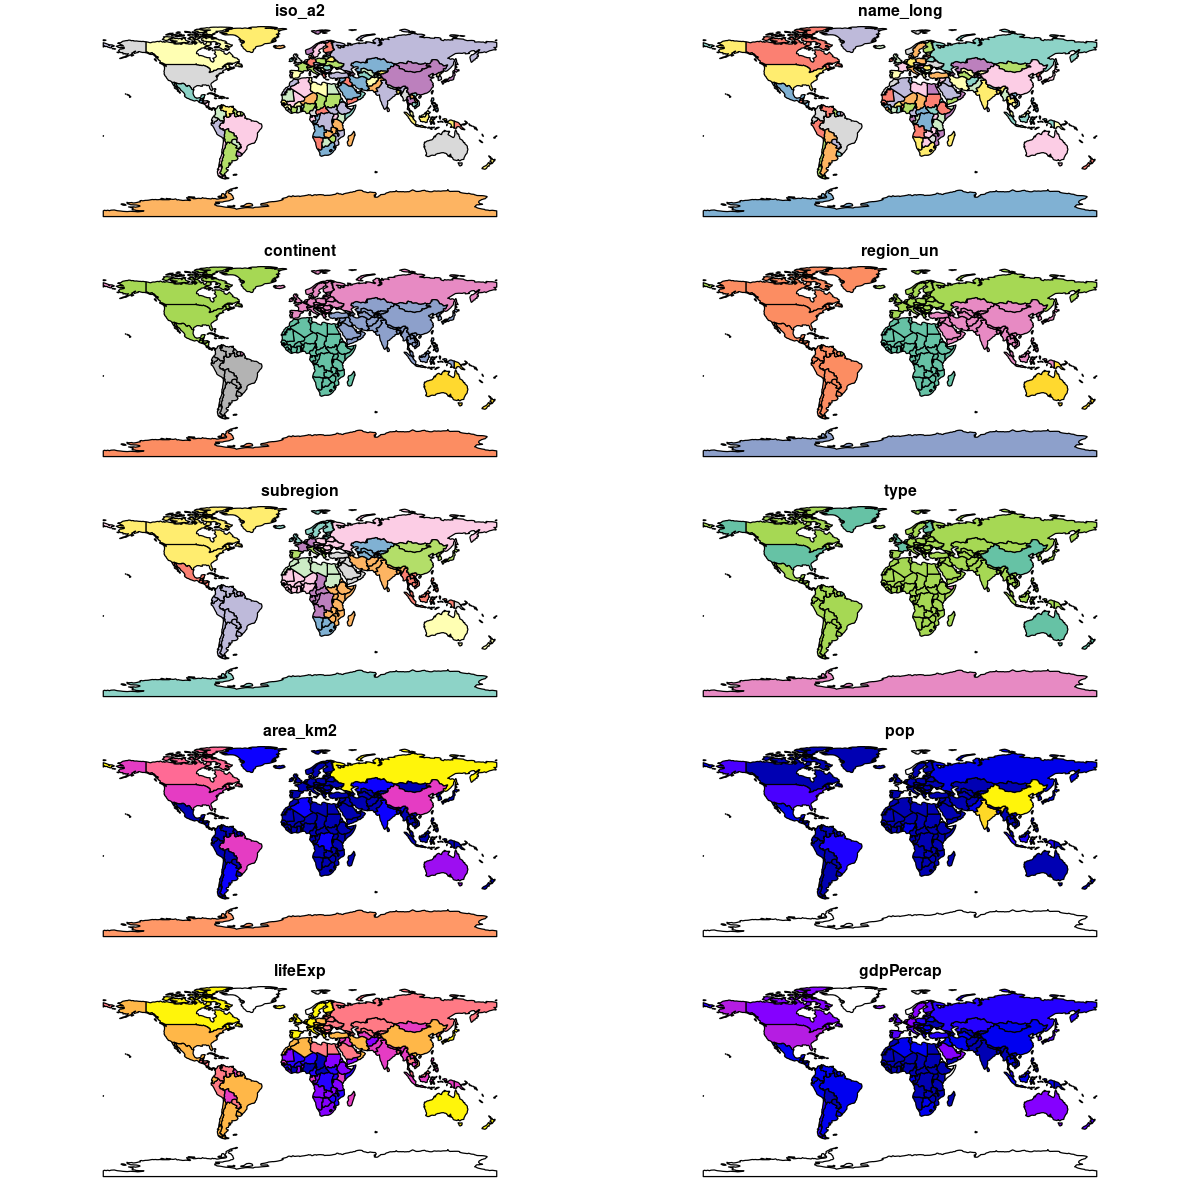

In [7]:
plot(world)

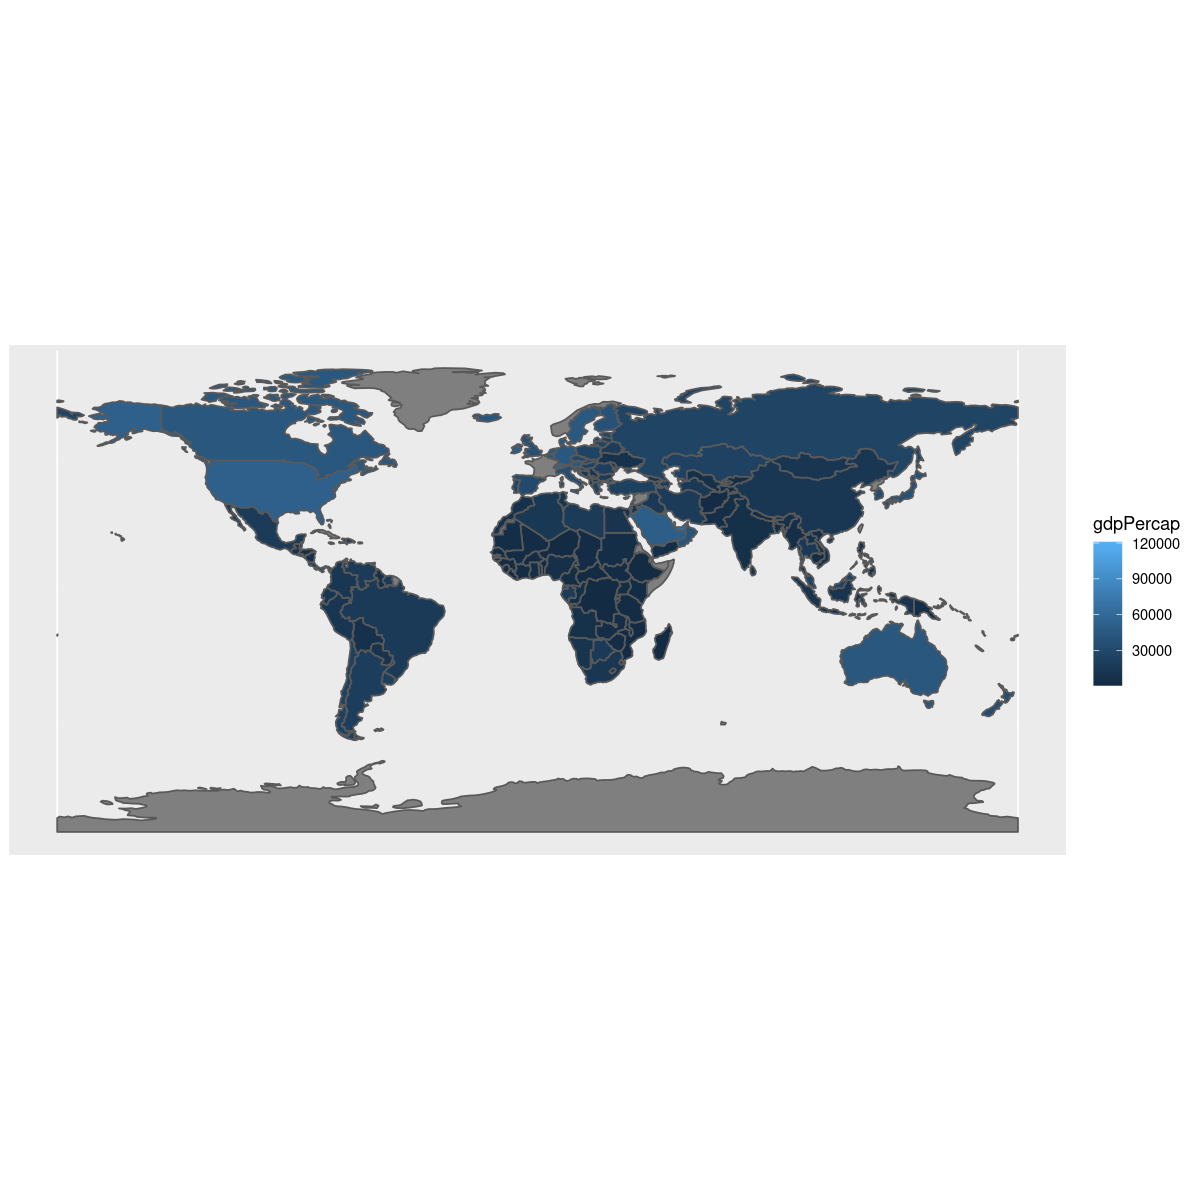

In [8]:
world %>%
    ggplot() +
    geom_sf(aes(fill=gdpPercap))

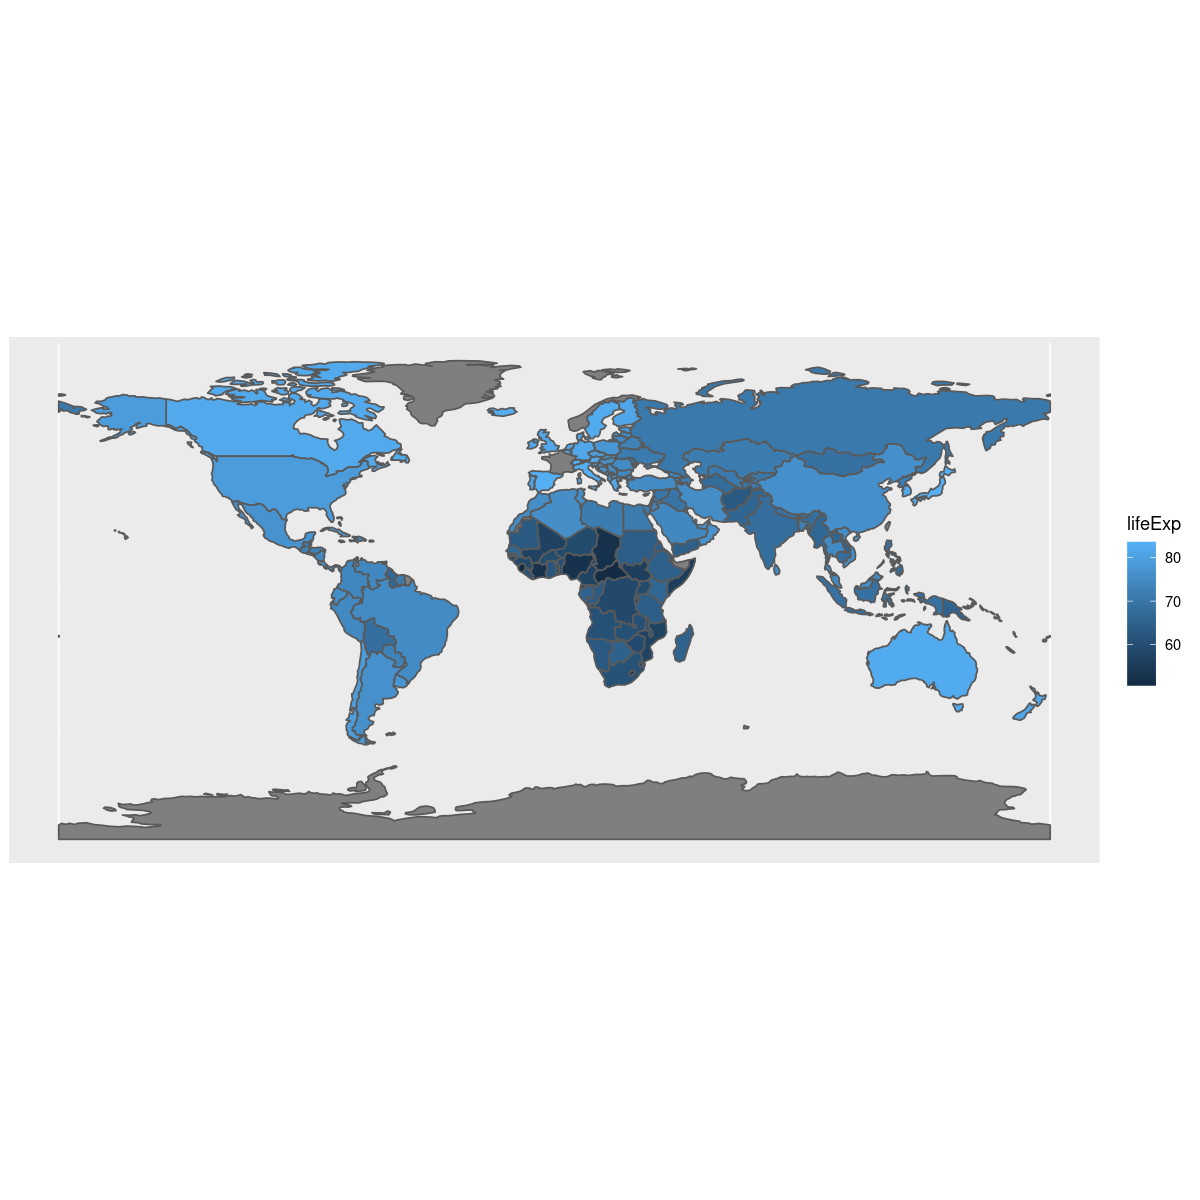

In [11]:
world %>%
    ggplot() +
    geom_sf(aes(fill=lifeExp))

In [12]:
world %>%
    filter(continent == "Africa") 

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geom
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.79,52234869,64.163,2402.0994,MULTIPOLYGON (((33.90371 -0...
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.60,NA,NA,NA,MULTIPOLYGON (((-8.66559 27...
3,CD,Democratic Republic of the Congo,Africa,Africa,Middle Africa,Sovereign country,2323492.48,73722860,58.782,785.3473,MULTIPOLYGON (((29.34 -4.49...
4,SO,Somalia,Africa,Africa,Eastern Africa,Sovereign country,484332.79,13513125,55.467,NA,MULTIPOLYGON (((41.58513 -1...
5,KE,Kenya,Africa,Africa,Eastern Africa,Sovereign country,590836.91,46024250,66.242,2753.2361,MULTIPOLYGON (((39.20222 -4...
6,SD,Sudan,Africa,Africa,Northern Africa,Sovereign country,1850885.56,37737913,64.002,4188.3348,MULTIPOLYGON (((23.88711 8....
7,TD,Chad,Africa,Africa,Middle Africa,Sovereign country,1271694.60,13569438,52.204,2076.6500,MULTIPOLYGON (((23.83766 19...
8,ZA,South Africa,Africa,Africa,Southern Africa,Sovereign country,1216400.83,54539571,60.993,12389.7147,MULTIPOLYGON (((16.34498 -2...
9,LS,Lesotho,Africa,Africa,Southern Africa,Sovereign country,27505.65,2145785,53.268,2677.1981,MULTIPOLYGON (((28.97826 -2...


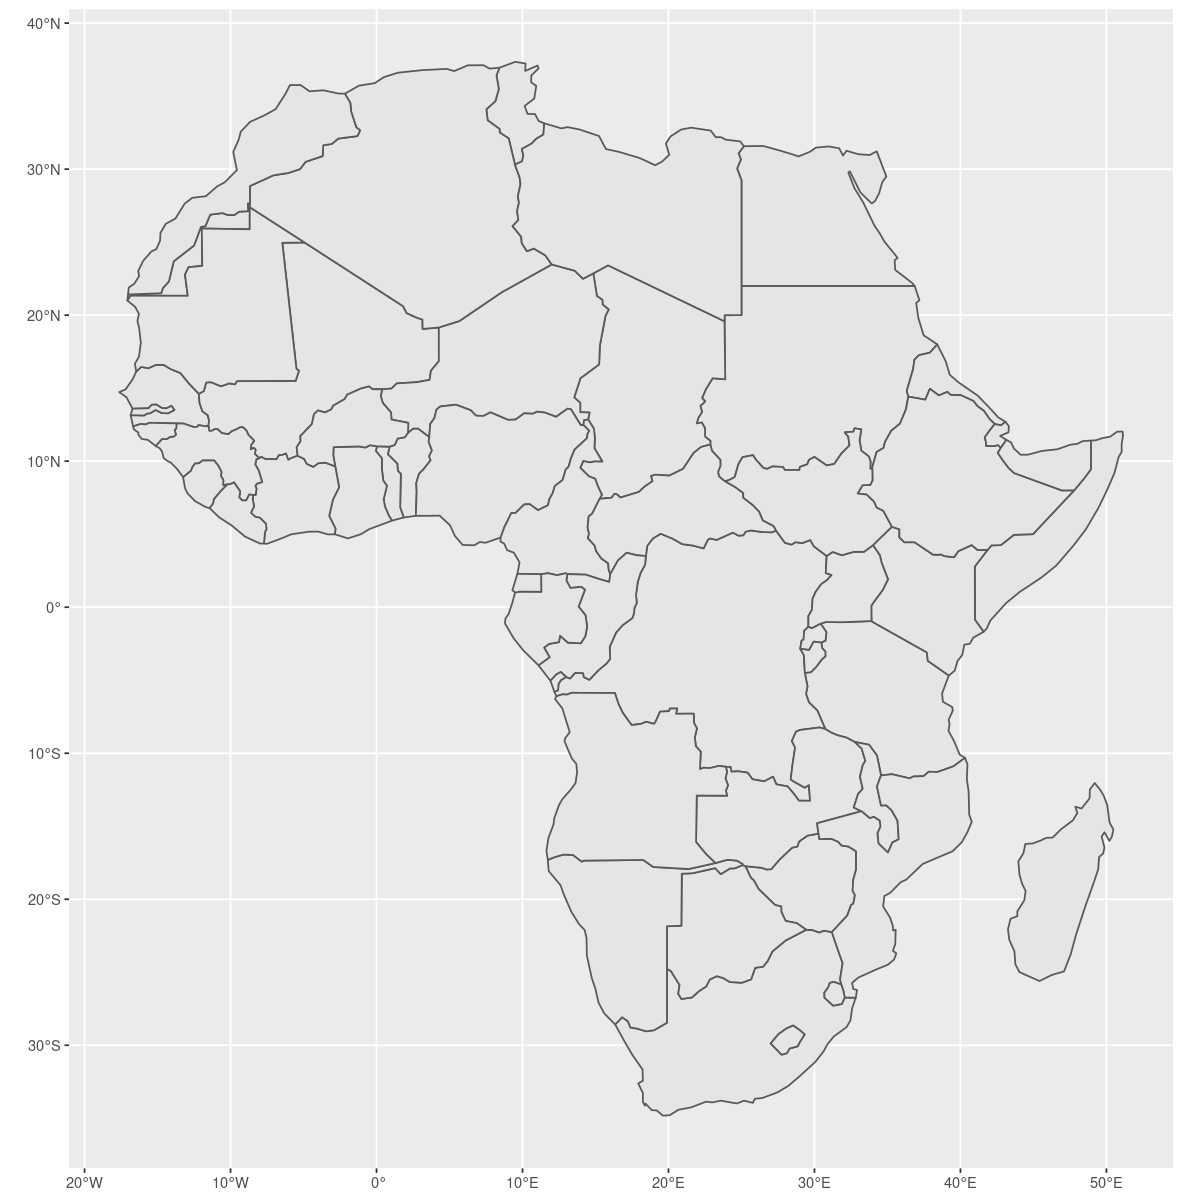

In [13]:
world %>%
    filter(continent == "Africa") %>%
    ggplot() +
    geom_sf()

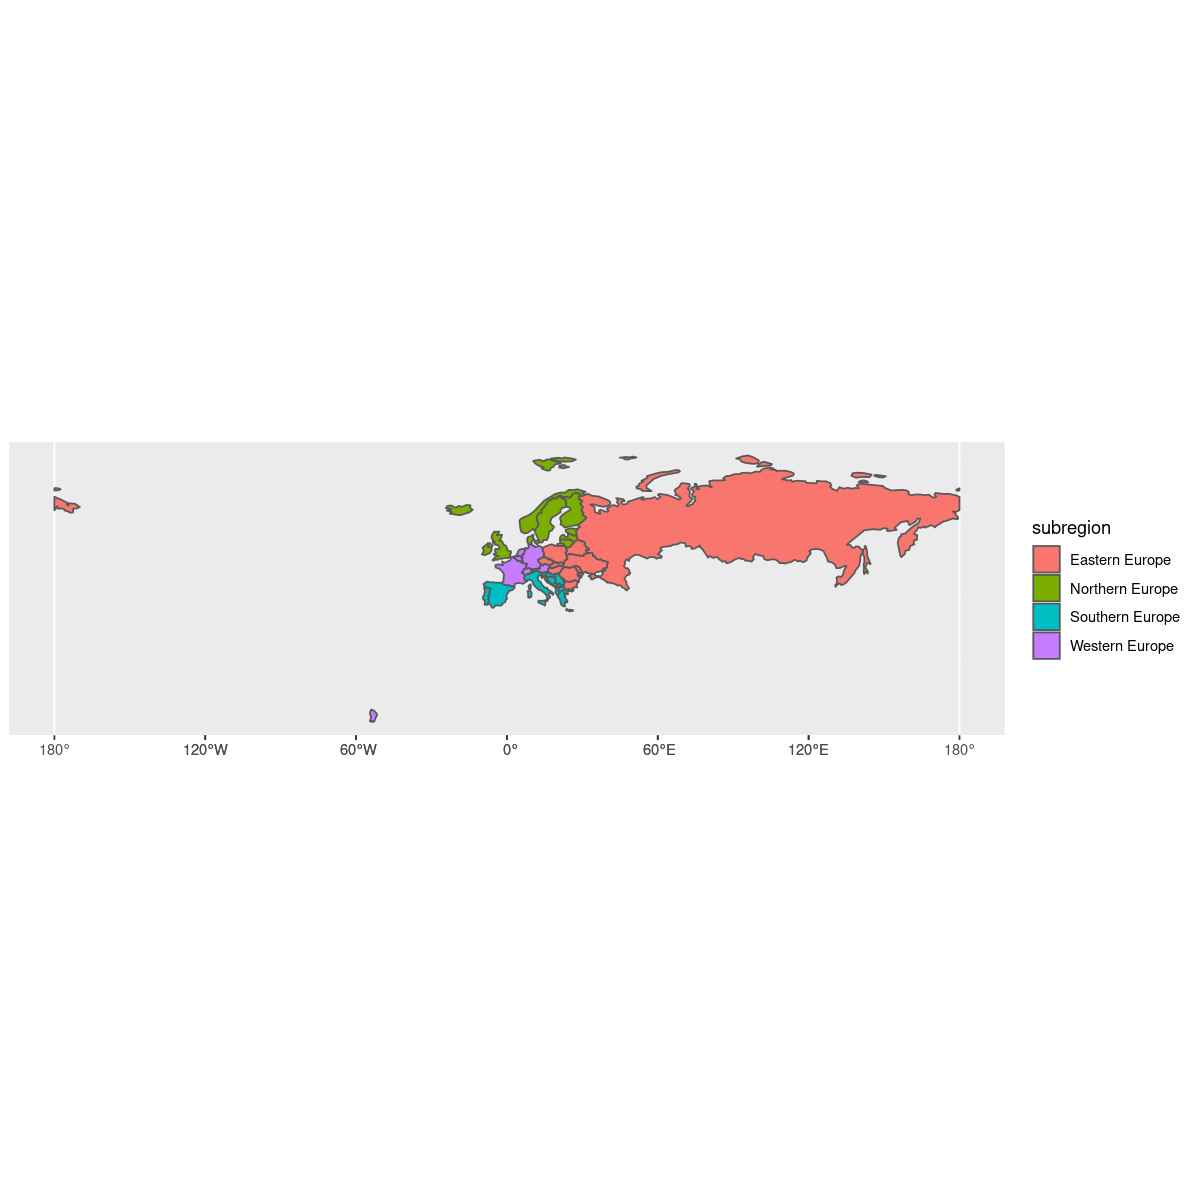

In [14]:
world %>%
    filter(region_un == "Europe") %>%
    ggplot() +
    geom_sf(aes(fill=subregion))

In [15]:
world_mini = world[1:2, 1:3]
world_mini

iso_a2,name_long,continent,geom
<chr>,<chr>,<chr>,<MULTIPOLYGON [°]>
FJ,Fiji,Oceania,MULTIPOLYGON (((-180 -16.55...
TZ,Tanzania,Africa,MULTIPOLYGON (((33.90371 -0...


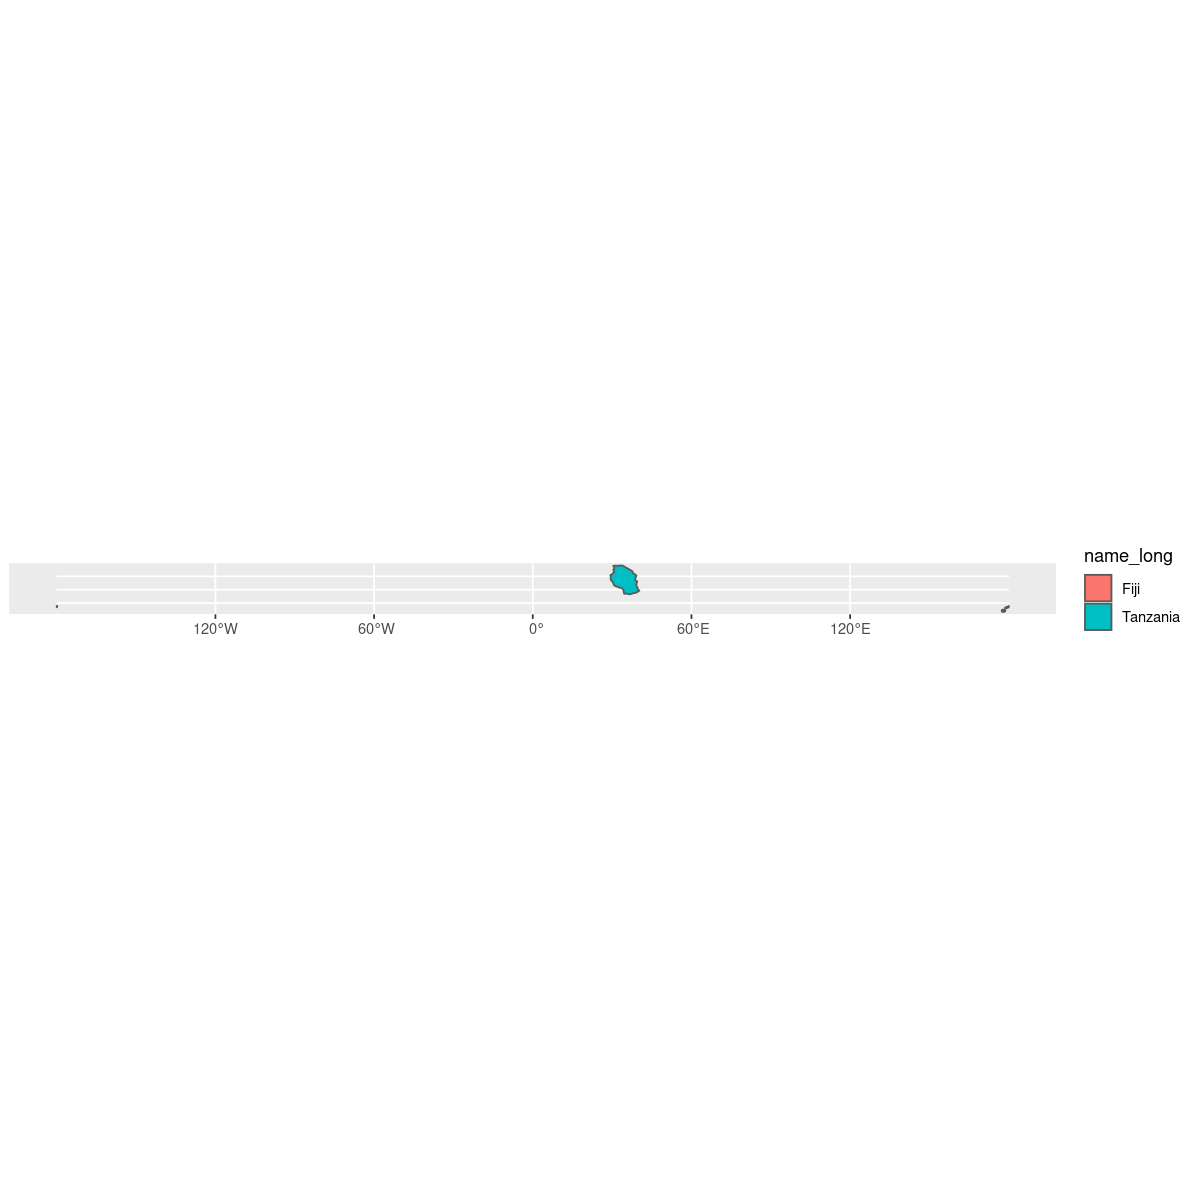

In [16]:
world_mini %>%
    ggplot() +
    geom_sf(aes(fill=name_long))